# Problem Set 2

Many of the concepts needed to complete this homework are introduced in the recitation notebooks and the python tutorials. 

In [181]:
# import the functions/libraries you will need here
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, LeaveOneOut, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

### Python Basics

#### (1)
Based on excercise 12 chapter 4 in ISLR.  
$(a)$ write a function called `power` that raises the input to 3rd power. Use the function to calculate $10^3$ 

In [2]:
def power(input):
    return input**3


power(10)
    

1000

$(b)$ write a function called `power2` that takes two inputs and raises the first number to the power of the second number. Use this function to calculate $10^3$, $8^{17}$ and $131^3$

In [3]:
def power2(input1, input2):
    return input1**input2

print(power2(8, 17))
print(power2(10, 3))
print(power2(131, 3))

2251799813685248
1000
2248091


$(c)$ Create lists of values of squared and cubed vlaues of 1 through 5 using you functions. You can use loops or list comprehensions to do this. Display the curves of the first, second and third powers of the inputs

   First  Second  Third
0      1       1      1
1      2       4      8
2      3       9     27
3      4      16     64
4      5      25    125


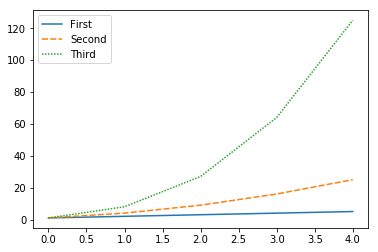

In [4]:
values = []
for i in range(5):
    i = i+1
    values.append([i, power2(i, 2), power2(i,3)])

values = pd.DataFrame(values, columns=['First', 'Second', 'Third'])
print(values)
sns.lineplot(data=values)

$(d)$ Add a legend to the plot that shows which color corresponds to the power

## Done

$(e)$ create a function called `plot_power` that creates a plot for a range of values that are given as an argument raised to the integer power given. A function call should look something like this `plot_power(low,high,power)` feel free to use different variable names for inputs.

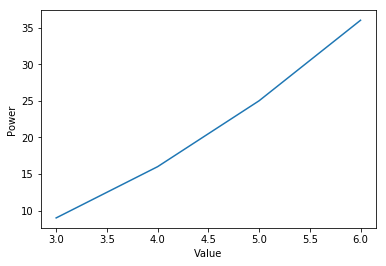

In [5]:
def plot_power(low, high, power):
    i = low
    values = []
    while i <= high:
        values.append([i,power2(i, power)])
        i = i+1
    values = pd.DataFrame(values, columns=['Value', 'Power'])
    return sns.lineplot(x = "Value", y = "Power", data=values)
    
plot_power(3, 6, 2)

$(f)$ Define a function called `display_power_plots` that plots multiple powers based on a list of them passed as an argument over a range passed in similarly to the one above. Add a legend that shows which curve corresponds to which power. A function call should something look like this `display_power_plots(low,high,[p1,p2,p3])`

In [6]:
length = 5
width = 5
values = np.zeros((length, width))
values[0][0]
l =[1, 2, 3, 4, 7,]
for c, i in enumerate(l):
    print(c,i)

0 1
1 2
2 3
3 4
4 7


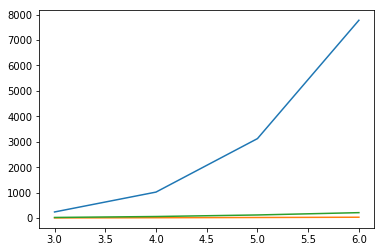

In [7]:
def display_power_plots(low, high, list_of_powers):
#     length = high-low + 1
#     width = len(list_of_powers) + 1
#     values = np.zeros((length, width))
#     i = low
#     index = list(range(0, high-low))
#     for column, power in enumerate(list_of_powers):
#         while i <= high:
#             index = 0
#             values[index][column] = power2(i, power)
#             i =+ 1
#             index += 1
#             print(values)
#     return sns.lineplot(data=values)

    for power in list_of_powers:
        sns.lineplot(range(low, high+1), [power2(x, power) for x in range(low, high +1)])

list_of_powers = [5,2,3]
display_power_plots(3, 6, list_of_powers)

#### 2
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.  
Look at the dtypes of the variables and correct the problematic values to be the mean of the values that are present. Update the column so python knows to treat the column as a numeric variable and not strings.

In [107]:
df = pd.read_csv(r'C:\Users\ben1c\Projects\Econ 484\Homework\Auto.csv')

In [108]:
df = df.replace({'?': '0'})
df['horsepower'] = df['horsepower'].astype(float)
mean = df.horsepower.mean()
df = df.replace({0.0 : mean})

$(a)$ Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the median() method on the mpg column of the dataframe that you are suing to store the auto data. 

In [109]:
df['mpg'] = np.where(df['mpg'] > df.mpg.median(), 1, 0)

Calling the functions is similar for all of the functions from sklearn. This is one of the really nice things about the library: if you know how to use one then you know how to use them all.

$(b)$ Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

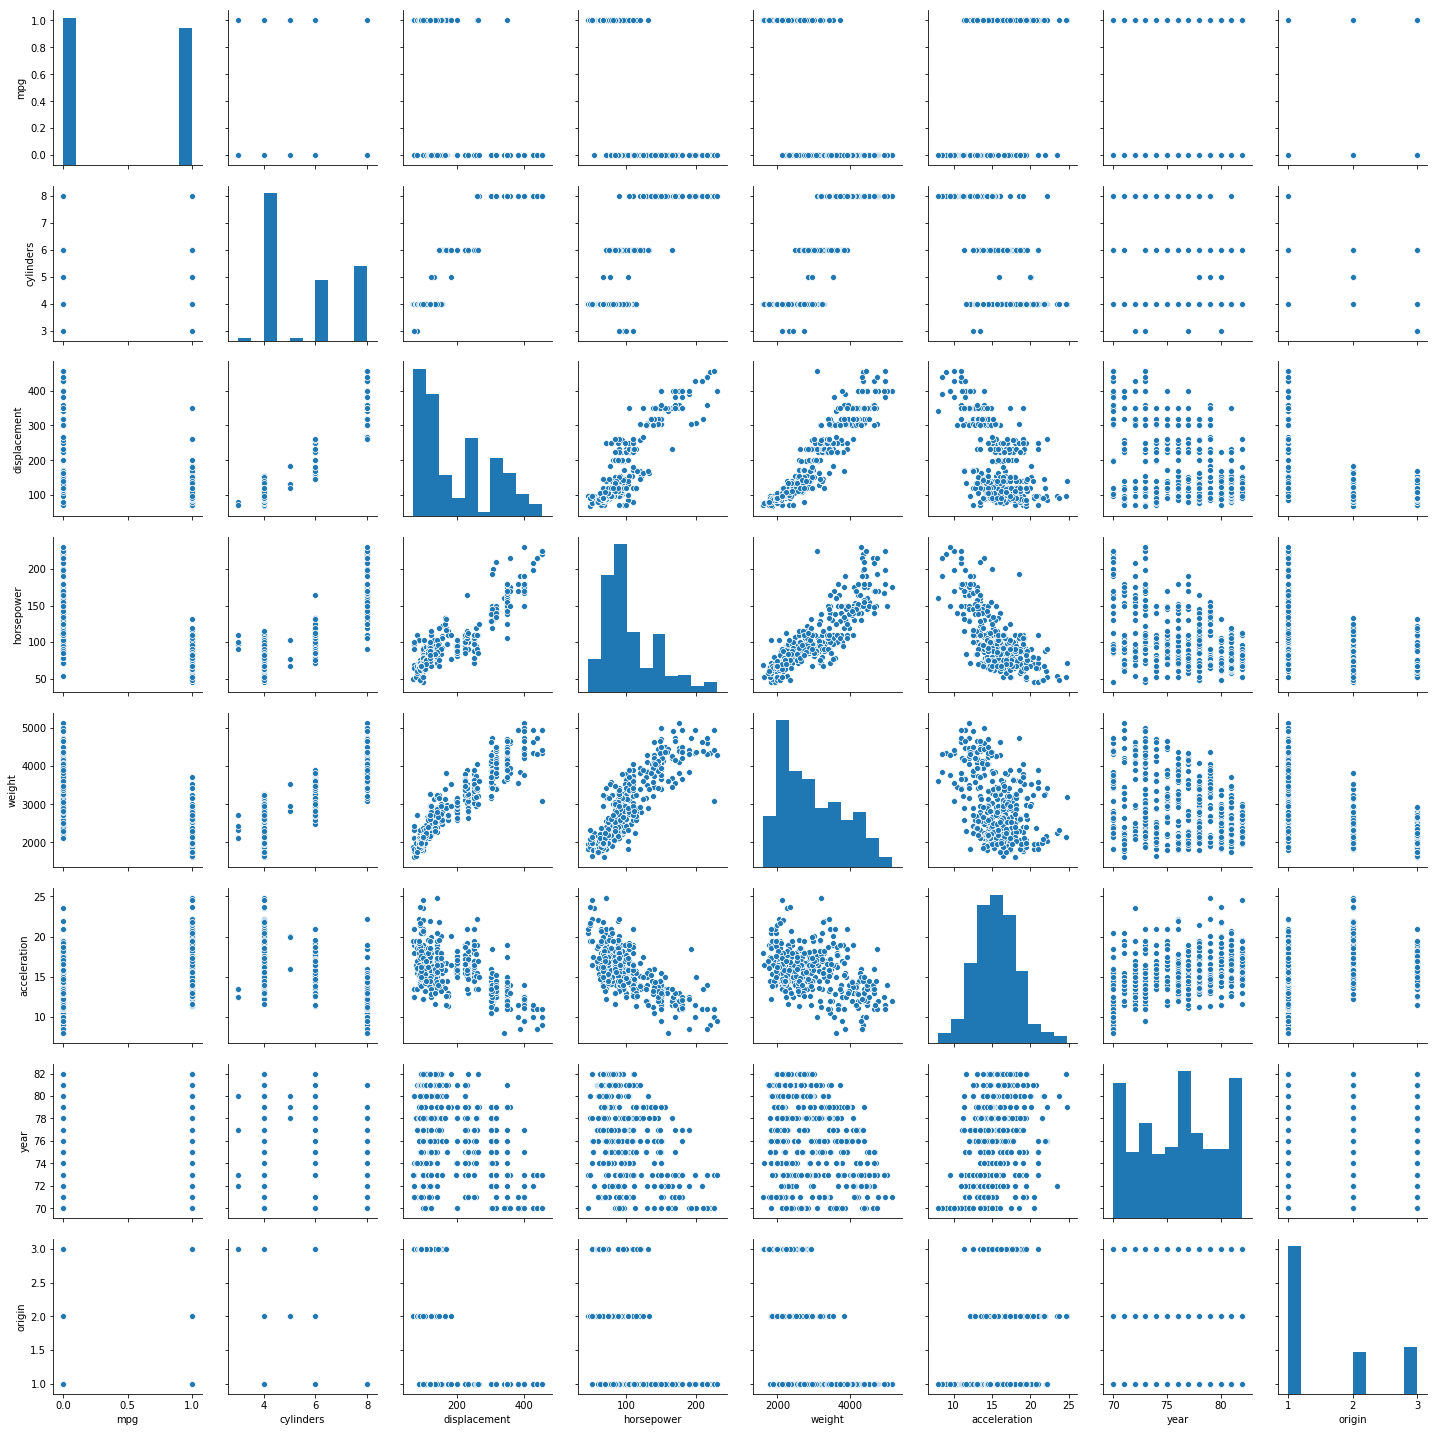

In [110]:
sns.pairplot(df)

Horsepower, weight, acceleration all seem like they are correlated with mgp.

$(c)$ Split the data into a training set and test set. The variable you created called `mpg01` will be the y variable.

In [111]:
X = pd.DataFrame(df, columns=['horsepower', 'weight', 'acceleration'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

$(d)$ Perform Linear Discriminant Analysis (LDA) on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?

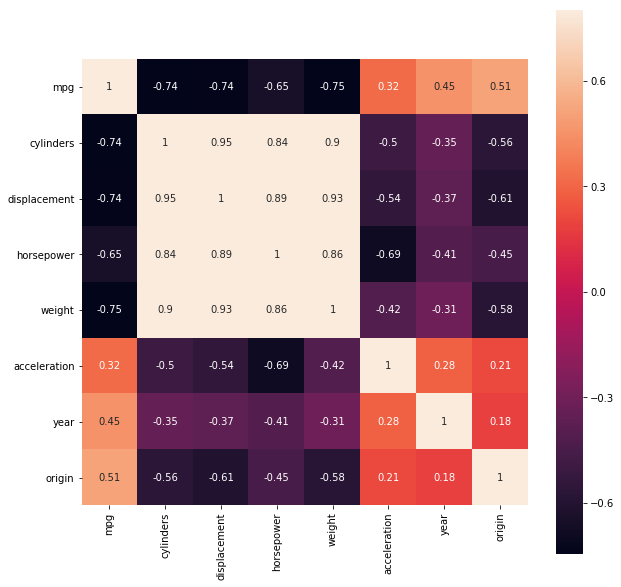

In [112]:
# This is to see the actual linear correlation
correlation_map = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_map, vmax=.8, square=True, annot=True)

In [113]:
LDA = LinearDiscriminantAnalysis(n_components=4)
LDA.fit_transform(X_train, y_train)
LDA.score(X_test, y_test)

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


0.803030303030303

$(e)$ Perform Quadratic Discriminant Analysis (QDA) on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?

In [114]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
QDA.score(X_test, y_test)

0.7954545454545454

$(f)$ Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?

In [119]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
train_predictions = LR.predict(X_train)
test_predictions = LR.predict(X_test)
print("Train acc: {}".format(accuracy_score(y_train, train_predictions)))
print("Test acc: {}".format(accuracy_score(y_test, test_predictions)))

Train acc: 0.8905660377358491
Test acc: 0.803030303030303


c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


$(g)$ Perform KNN on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?  
Which value of K seems to perform the best on this data set?

In [115]:
clf = KNeighborsClassifier()
gridsearch = GridSearchCV(clf, {"n_neighbors": [1, 3, 5, 7, 9, 11]})
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))


y_pred_train = gridsearch.predict(X_train)
y_pred_test = gridsearch.predict(X_test)
print("Train Accuracy: {}\tTest Accuracy: {}".format(accuracy_score(y_train, y_pred_train),
                                           accuracy_score(y_test, y_pred_test)))

Best Params: {'n_neighbors': 7}
Train Accuracy: 0.9132075471698113	Test Accuracy: 0.8106060606060606


c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Now run a random forest classifier on the data. Use cross validation to find optimal parameters.

In [122]:
clf = RandomForestClassifier()
gridsearch = GridSearchCV(clf, {'max_depth': [1, 2, 4, 8]})
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))


y_pred_train = gridsearch.predict(X_train)
y_pred_test = gridsearch.predict(X_test)
print("Train Accuracy: {}\tTest Accuracy: {}".format(accuracy_score(y_train, y_pred_train),
                                           accuracy_score(y_test, y_pred_test)))

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in

Best Params: {'max_depth': 1}
Train Accuracy: 0.909433962264151	Test Accuracy: 0.8181818181818182


c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimat

#### 3 
The next problem deals with regularized regression and cross validation. The boston dataset is described right after it is loaded in.  
$(a)$ Use this data to fit an OLS, LASSO, ridge, and ElasticNet model on the data. Use the default for the penalty coefficient. Display the coefficients and test error for each.

In [187]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### OLS

In [167]:
linearmodel = LinearRegression()
linearmodel = linearmodel.fit(X_train, y_train)
cross = cross_validate(linearmodel, x, y, cv=3, scoring='neg_mean_squared_error', return_estimator=True)

print('Mean MSE:', cross['test_score'].mean())
print(list(zip(x.columns, linearmodel.coef_)))

MSE: -169.00831238145855
[('CRIM', -0.12874971839943478), ('ZN', 0.0378232228486339), ('INDUS', 0.05821092334692948), ('CHAS', 3.2386681222715747), ('NOX', -16.16981196436887), ('RM', 3.9020511607116064), ('AGE', -0.012850782518180778), ('DIS', -1.4222242954487214), ('RAD', 0.23485391491030597), ('TAX', -0.008213319470177234), ('PTRATIO', -0.9287224590798955), ('B', 0.011769592080104474), ('LSTAT', -0.547566338176198)]


### Lasso

In [169]:
lasso = Lasso()
lasso = lasso.fit(X_train, y_train)
cross = cross_validate(lasso, x, y, cv=3, scoring='neg_mean_squared_error', return_estimator=True)

print('Mean MSE:', cross['test_score'].mean())
print(list(zip(x.columns, lasso.coef_)))

Mean MSE: -47.82564679534562
[('CRIM', -0.0784277108343245), ('ZN', 0.0350440619620701), ('INDUS', -0.0), ('CHAS', 0.0), ('NOX', -0.0), ('RM', 1.1310216675660572), ('AGE', 0.007724419154412722), ('DIS', -0.6481166321003615), ('RAD', 0.18629573821912584), ('TAX', -0.009411851363514766), ('PTRATIO', -0.7018402021141484), ('B', 0.011095149222609084), ('LSTAT', -0.785539538774687)]


### Ridge

In [170]:
ridge = Ridge()
ridge = ridge.fit(X_train, y_train)
cross = cross_validate(ridge, x, y, cv=3, scoring='neg_mean_squared_error', return_estimator=True)

print('Mean MSE:', cross['test_score'].mean())
print(list(zip(x.columns, ridge.coef_)))

Mean MSE: -109.22722035290002
[('CRIM', -0.12263617769212339), ('ZN', 0.038848613508879956), ('INDUS', 0.023351210908770032), ('CHAS', 3.025133889957562), ('NOX', -8.051367855309834), ('RM', 3.907519315574383), ('AGE', -0.019622422120134105), ('DIS', -1.3019557475535553), ('RAD', 0.21697584547547544), ('TAX', -0.008973330990095315), ('PTRATIO', -0.8383582030402676), ('B', 0.012002241983879593), ('LSTAT', -0.5669862366842464)]


### ElasticNet

In [171]:
net = ElasticNetCV()
net = net.fit(X_train, y_train)
cross = cross_validate(net, x, y, cv=3, scoring='neg_mean_squared_error', return_estimator=True)

print('Mean MSE:', cross['test_score'].mean())
print(list(zip(x.columns, net.coef_)))

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv wil

Mean MSE: -46.18048484107428
[('CRIM', -0.08891000152188655), ('ZN', 0.038872783492283985), ('INDUS', -0.0), ('CHAS', 0.0), ('NOX', -0.0), ('RM', 0.6473741539750398), ('AGE', 0.013762859108627352), ('DIS', -0.5973672951573914), ('RAD', 0.21651147246427324), ('TAX', -0.010770202662052602), ('PTRATIO', -0.6823769294294264), ('B', 0.010863710446462957), ('LSTAT', -0.8106764266023688)]


$(b)$ Describe the differences that you see in the coefficients and the errors. Which model performs best?

ElasticNet and Lasso have the best Mean MSE (closest to zero). Lasso appears to be setting things equal to zero and so does ElasticNet, while Ridge and OLS don't have anything equal to zero.

$(c)$ Now use cross validation, to find the optimal penalty parameter. Use LOOCV on one of the models and Kfold on another. Comment on what changes between the default

In [198]:
net = ElasticNet()
KFolds = KFold(n_splits=3)
grid_search = GridSearchCV(net, {'alpha': [.001, .0001, .01, .1]}, cv=KFolds)
best_model = grid_search.fit(x, y)
print('Best Model:', best_model.best_estimator_.get_params()['alpha'])
print('Test Set Score:', grid_search.score(X_test, y_test))

Best Model: 0.1
Test Set Score: 0.730461020184956


c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [193]:
LOOCV = LeaveOneOut()
LOOCV.get_n_splits(x)
    
grid_search = GridSearchCV(net, {'alpha': [.001, .0001, .01, .1]}, cv=LOOCV)
best_model = grid_search.fit(X_train, y_train)
print('Best Model:', best_model.best_estimator_.get_params()['alpha'])
print('Test Set Score:', grid_search.score(X_test, y_test))

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-p

Best Model: 0.001
Test Set Score: 0.72499416947256


c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ben1c\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes ar